<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/GraficoPOBLACIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pylab import *
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
url="https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
covid=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
lista_fechas=covid.iloc[:,0].unique()
# lista_fechas=pd.DatetimeIndex(lista_fechas)

6/3/2020 0:00:00 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


4/6/2021 0:00:00 

6/3/2020 0:00:00 

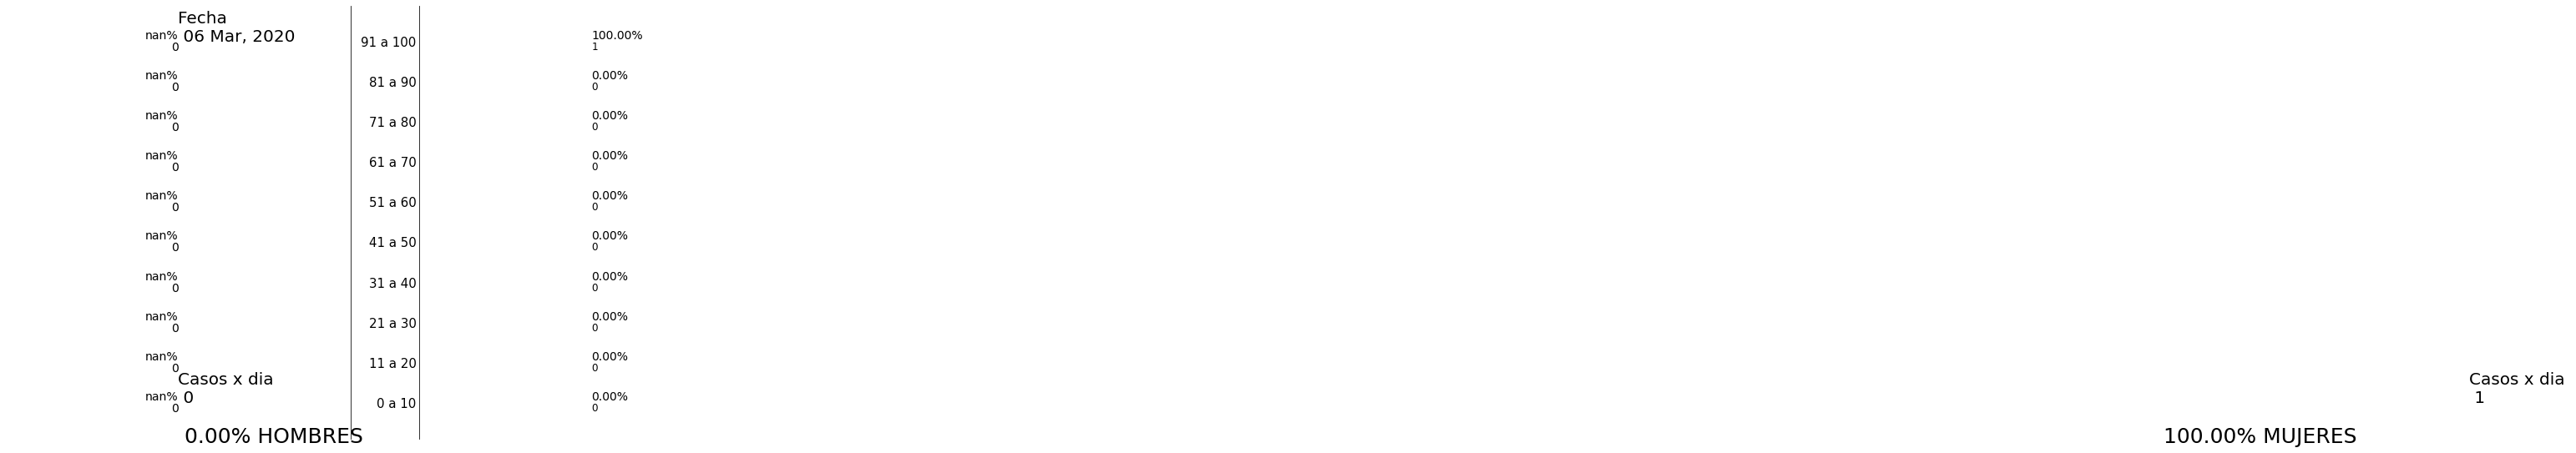

In [78]:
def RacePiramide(fecha):
  
  datos=covid.iloc[:,[18,7,9]]
  datos.columns=["fecha","edad","sexo"] 
  datos=datos[datos.fecha==fecha] 
  bins=[0,10,20,30,40,50,60,70,80,90,100]
  rango_edad=["0 a 10","11 a 20","21 a 30","31 a 40","41 a 50","51 a 60","61 a 70","71 a 80","81 a 90","91 a 100"]
  datos.edad=pd.cut(datos.edad,bins,labels=rango_edad)
  


  print("\r""{0}".format(fecha),end=" ")

  datos_m=datos[(datos.sexo=="M")]
  datos_f=datos[(datos.sexo=="F")]
  edad_m=datos_m.edad.value_counts().rename_axis("Edad").reset_index(name="Casos").sort_values("Edad",ascending=True)
  edad_f=datos_f.edad.value_counts().rename_axis("Edad").reset_index(name="Casos").sort_values("Edad",ascending=True)


  # fig,ax= subplots(ncols=2,figsize=(14,9))
  subplots_adjust(left=0,  bottom=0.1,     right=0.9,   top=0.9,  wspace=0.2, hspace=0.35)
  ax[0].clear()
  
  # ax[0].axis("off")
  ax[0].barh(edad_m.Edad,edad_m.Casos,color="skyblue")
  ax[0].set(yticks=[],xticks=[])
  for x in range(len(edad_m)): 
    ax[0].text(edad_m.Casos[x],edad_m.Edad[x],"{:,.0f}".format(edad_m.Casos[x]),horizontalalignment="right",size=14,verticalalignment="top")
    ax[0].text(edad_m.Casos[x],edad_m.Edad[x],"{:,.2f}%".format(100*edad_m.Casos[x]/len(datos_m)),size=14,verticalalignment="bottom",horizontalalignment="right") ##porccentaje

  ax[0].text(max(edad_m.Casos)*1,"0 a 10","Casos x dia \n {:,.0f}".format(len(datos_m)),horizontalalignment="left",size=20)
  ax[0].text(max(edad_m.Casos)*1,"91 a 100","Fecha\n {}".format(datetime.datetime.strptime(fecha,'%d/%m/%Y %H:%M:%S').strftime("%d %b, %Y")),horizontalalignment="left",size=20)
  # strptime(date_time_str, '%d/%m/%y %H:%M:%S')
  ax[0].text(max(edad_m.Casos)*0.9,-1," {:,.2f}% HOMBRES".format(100*len(datos_m)/len(datos)),horizontalalignment="left",size=25)
  setp(ax[0], xlim=(0,max(edad_m.Casos)*1.2))
  ax[0].invert_xaxis()






  ax[1].clear()
  ax[1].barh(edad_f.Edad,edad_m.Casos,color="pink")
  ax[1].set(xticks=[])

  for y in range(len(edad_f)):
    ax[1].text(edad_m.Casos[y],edad_m.Edad[y],"{:,.2f}%".format(100*edad_f.Casos[y]/len(datos_f)),size=14,verticalalignment="bottom") ##porccentaje
    ax[1].text(edad_m.Casos[y],edad_m.Edad[y],"{:,.0f}".format(edad_f.Casos[y]),size=12,verticalalignment="top") ##real

  ax[1].tick_params(axis='y',labelsize=15,rotation=0,size=0,) 
  ax[1].text(max(edad_f.Casos)*0.6,"0 a 10","Casos x dia \n {:,.0f}".format(len(datos_f)),horizontalalignment="left",size=20)
  ax[1].text(max(edad_f.Casos)*0.5,-1," {:,.2f}% MUJERES".format(100*len(datos_f)/len(datos)),horizontalalignment="left",size=25)


  right_side = ax[1].spines["right"]
  right_side.set_visible(False)
  downside = ax[1].spines["bottom"]
  downside.set_visible(False)
  topside = ax[1].spines["top"]
  topside.set_visible(False)
  right_sidex0 = ax[0].spines["left"]
  right_sidex0.set_visible(False)
  downsidex0 = ax[0].spines["bottom"]
  downsidex0.set_visible(False)
  topsidex0 = ax[0].spines["top"]
  topsidex0.set_visible(False)
  # text(max(edad_f.Casos),-1,"TOTAL={:,.0f}".format(len(datos)),horizontalalignment="right")
  
fig,ax= subplots(ncols=2,figsize=(14,9))
# RacePiramide(lista_fechas[-300])


mi_anim=animation.FuncAnimation(fig,RacePiramide,frames=lista_fechas,interval=700)
rcParams['animation.embed_limit'] = 2**128
HTML(mi_anim.to_html5_video())

In [ ]:
lista_fechas